Here I'm comparing different methods of modeling the negative feedback driven by glycerol production: linear, exponential, and hill function. All of these were tested on Rozemary's model 28.

**Linear details**

- Section 5 is the first linear glycerol where I did not add logic for if glycerol levels were negative whereas with Section 7, I did add that logic within the ODE function. 
- It ended up not mattering, in terms of producing good fits to the data, but the former took longer than the latter to run, presumably because it was trying to solve unstable systems. These also produced similar results for the parameter values (see images saved in Glycerol folder, top 200 plotted).

**Exponential details**
- These simulations were based off of an exponential function that Tim had suggested that I modified to fit our model. 

**Hill function details**
- This is what I had been using.

**Results**: 

Generally the glycerol behavior all looked similar, but the exponential looks more smooth than some runs of the linear and the hill function. The hill function has one parameter set that is produces a "wavy" glycerol behavior, which I did not look into. The timing and the fold change look relatively similar to what I had been observed, though the hill function produced some glycerol behaviors that were larger than two-three fold, which was the normal case. Overall, it might be best to continue with the linear case since it had the least parameters, however, we need to check with the nuclear translocation models first to see if these three methods look the same.

# Import packages and set settings

In [9]:
%load_ext autoreload
%autoreload 2

import sys
# sys.path.insert(1, './python_mods/')
sys.path.insert(1, '../../python_modules') 
import plotting_Roze as plotting
import model_supp_gly as model_supp 
import model_gly as model
import saving
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import collections

In [3]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Functions

In [42]:
# model_lin = model.Model(model.gly_lin, model.simulate_t100a_experiment)

# model_expo_lin = model.Model(model.gly_expo_lin, model.simulate_t100a_experiment_expo)

model_lin_gly0 = model.Model(model.R_MM28_lin_gly0)

# model_hillfxn = model.Model(model.gly_hillfxn, model.simulate_t100a_experiment_hillfxn)

# Model

## Model Functions

## Model Variables (Constants)

In [24]:
dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)
# steps = 3001
time2 = np.linspace(0,dt*2401,steps)

Sln1_tot = model_supp.molarity_conversion(1176)
Sho1_tot = model_supp.molarity_conversion(1534)
Hog1_tot = model_supp.molarity_conversion(8225)
params_constants = [Sln1_tot, Sho1_tot, Hog1_tot, 0] #mM


Sln1 = 0
Sho1 = 0
Hog1_AC = 0
Hog1_AN = 0
Hog1_IN = 0.23 * Hog1_tot
Glycerol = 0.0001
initials = [Sln1, Sho1, Hog1_AC, Hog1_AN, Hog1_IN, Glycerol]


# labelnames = ['$- fb$', '$+ fb$', '$kb$',
#               '$k_1$', '$k_3$', '$k_5$', '$s_1$',
#               '$k_2$', '$k_4$', '$k_6$', '$d_1$',
#               '$K_{M1}$', '$K_{M3}$', '$K_{M5}$',
#               '$K_{M2}$', '$K_{M4}$', '$K_{M6}$']

labelnames = range(0,28)


wt_doses = [150, 350, 550]

# Parameter ranges
number_of_params = 28
minimums = [-8, 0, -4, 0, -8,
    -4, 0, 0, -8, -8,
    0, -8, -8, -8, -4,
    -4, 0, -4, -4, -4,
    -8, 0, -4, -4, 0,
    -8, -8, -2
    ]

maximums = [0, 8, 6, 8, 0,
    4, 8, 8, 0, 0,
    8, 0, 0, 0, 4,
    4, 8, 4, 4, 4,
    0, 8, 4, 4, 8,
    0, 2, 6
    ]

diff = np.asarray(maximums)-np.asarray(minimums) #for plotting
dims = (diff, minimums) #for plotting


# Load experimental data

In [32]:
exp_data, exp_time = model_supp.get_data(R=True)

wt_phospho_data, wt_nuc_data = exp_data
phospho_time, nuc_time = exp_time 

# Model Gly lin

## Load simulation data

In [33]:
folder = 'C:/Users/sksuzuki/Downloads/Rozemarijn/200424_Model28_MM_90perc_lin_gly/'


all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 998
Best last gen MSE: 2608.8719081430622
Mean last gen MSEs of top 5%: 4709.076926424147


## MSE results

In [40]:
## sort and check MSE calculation
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)


# exp_data1 = mapk_wt_data, [mapk_data_t100a_0[0], mapk_t100a_data[0], mapk_t100a_data[1]], map2k_wt_data, map2k_t100a_data, hog1_ramp_data, mapk_ptpD_data
# exp_time1 = mapk_time, mapk_time_t100a_long, mapk_ramp_time

# check = model_supp.calc_sim_score_lin(model_lin, sorted_thetas_EA[0], exp_data1, exp_time1, params_constants, initials)
# print(check[:18])
# sum(check[:18])

No handles with labels found to put in legend.


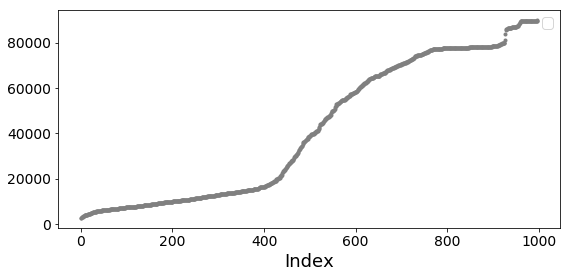

In [15]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


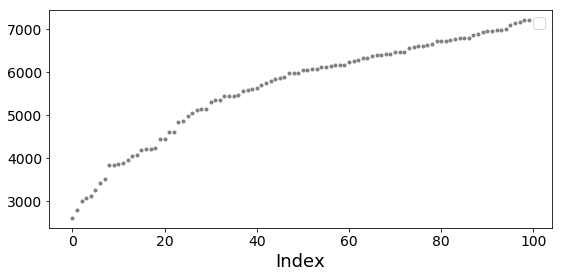

In [16]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

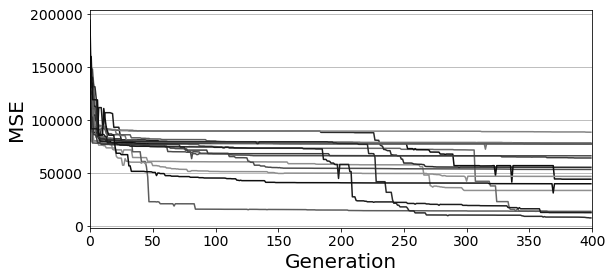

In [18]:
plotting.plt_mses_gen(400,all_mses,20)

## Parameter Distributions

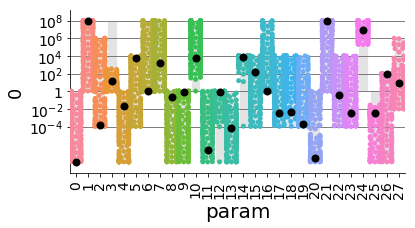

In [25]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
# df_top_thetas_EA.columns = labelnames

num_plt = 200
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
# df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param

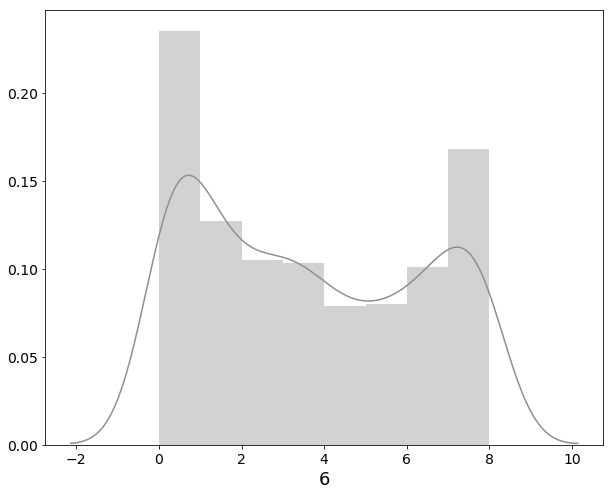

In [26]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[6]]))

## Fits with Standard Deviation

Dose: 150 complete.
Dose: 350 complete.
Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.

<Figure size 720x576 with 0 Axes>

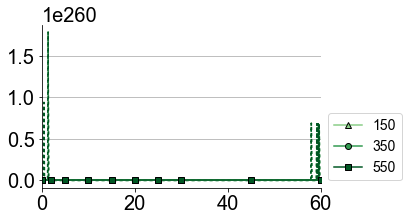

In [51]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[0:1], params_constants, initials,  wt_doses, time, param='phospho',
                        exp_data=wt_phospho_data, exp_time=phospho_time, ss=False, t100a=False, ci='sd',
                        save_fig='')

## Individual Runs

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
../../python_modules\plotting_Roze.py:70: RuntimeWarning: overflow encountered in multiply
  nuc2 = species = params[-1]*(data[:,3]+data[:,4])/params_constants[2]*100
../../python_modules\plotting_Roze.py:71: RuntimeWarning: overflow encountered in multiply
  nuc3 = params[-1]*(((data[:,3]+data[:,4])/params_constants[2]*100)-22)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

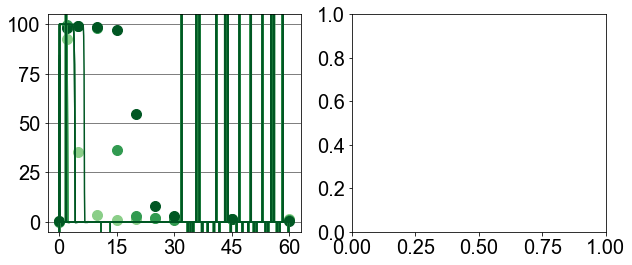

In [50]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_lin_gly0, sorted_thetas_EA, 10, params_constants, initials,  wt_doses, time, 'phospho', wt_phospho_data, mapk_t100a_data=None, mapk_time=phospho_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 720x576 with 0 Axes>

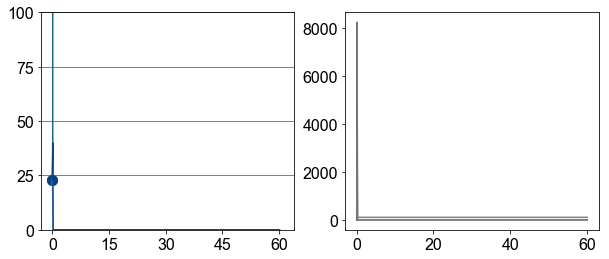

In [52]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_lin_gly0, sorted_thetas_EA, 1, params_constants, initials,  wt_doses, time, 'nuc4', wt_nuc_data, mapk_t100a_data=None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

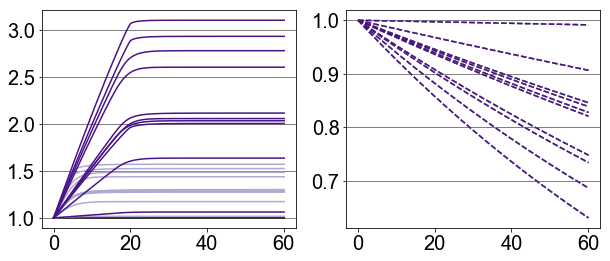

In [93]:
# original parameter values
plotting.plt_param_behaviors(model_lin, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 3, None, None, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

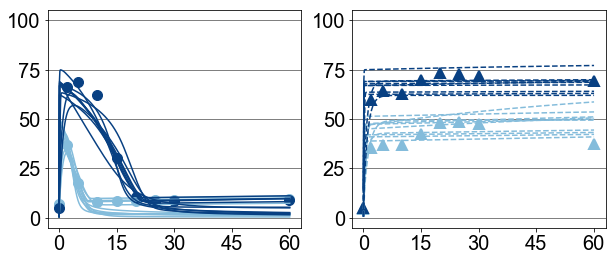

In [74]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials,  [150000,550000], time, 1, map2k_wt_data, map2k_t100a_data, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

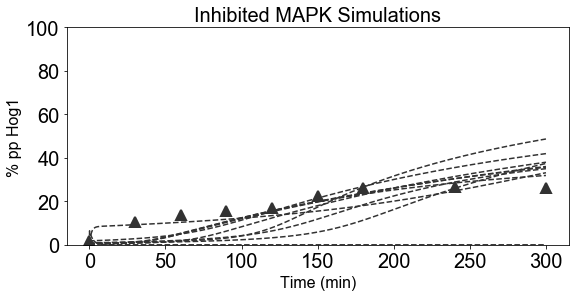

In [75]:
mapk_time_t100a_long = [0, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(model_fxns, sorted_thetas_EA, 10, params_constants, initials, mapk_data_t100a_0[0], mapk_time_t100a_long)

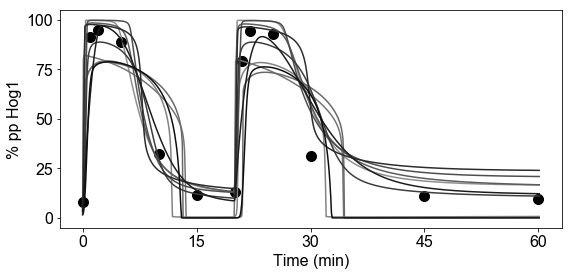

In [38]:
plotting.plt_ramp_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials, time, 2, ss = True, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

In [42]:
sims_M2c_kb_ea_l = plotting.simdata_to_list(M2c_fxns, M2c_sorted_thetas_EA, params_constants, initials, time, 2, ss = True)

0% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9% complete.
19% complete.
29% complete.
39% complete.
49% complete.
59% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


69% complete.
79% complete.
89% complete.
99% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


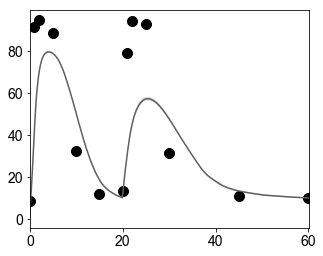

In [46]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


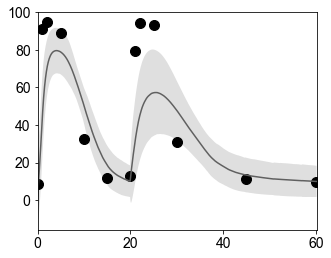

In [47]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time, ci='sd')

# Model Gly expo lin

## Load simulation data

In [97]:
folder = 'C:/Users/sksuzuki/Downloads/Rozemarijn/Testing_my_model/Glycerol/200205_kb_M2c_K_expo_linear/'


all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 995
Best last gen MSE: 1175.4003638917127
Mean last gen MSEs of top 5%: 1272.2487444970704


## MSE results

In [98]:
## sort and check MSE calculation
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)


exp_data1 = mapk_wt_data, [mapk_data_t100a_0[0], mapk_t100a_data[0], mapk_t100a_data[1]], map2k_wt_data, map2k_t100a_data, hog1_ramp_data, mapk_ptpD_data
exp_time1 = mapk_time, mapk_time_t100a_long, mapk_ramp_time

check = model_supp.calc_sim_score_lin(model_expo_lin, sorted_thetas_EA[0], exp_data1, exp_time1, params_constants, initials)
print(check[:18])
sum(check[:18])

[  65.2809345    73.03456614    0.            0.            0.
    0.            0.         1027.23574986   63.68627495  194.18605294
    0.            0.            0.            0.           24.75654715
   25.71287419   36.92596979   25.24287553]


1536.0618450473123

No handles with labels found to put in legend.


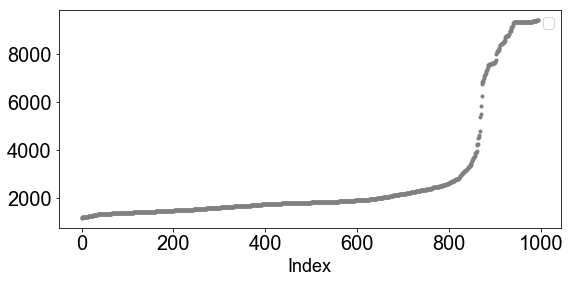

In [50]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


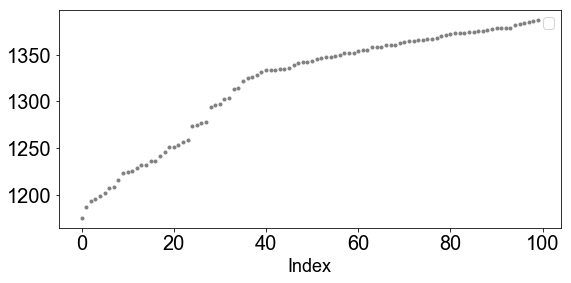

In [51]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

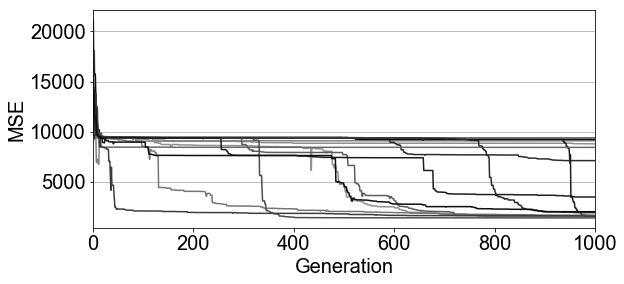

In [52]:
plotting.plt_mses_gen(1000,all_mses,20)

## Parameter Distributions

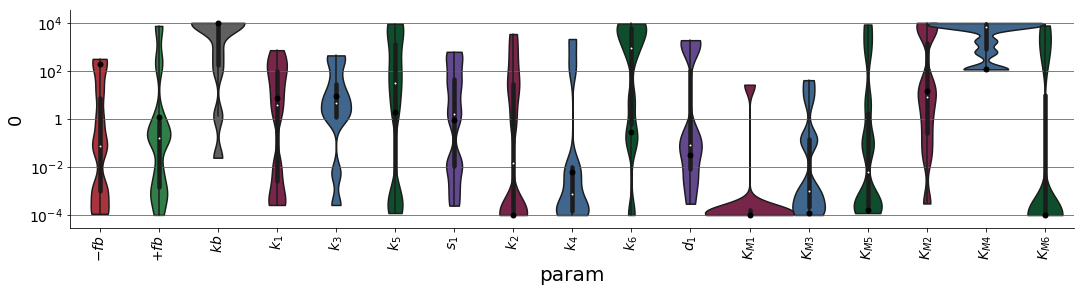

In [11]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

num_plt = 10
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param

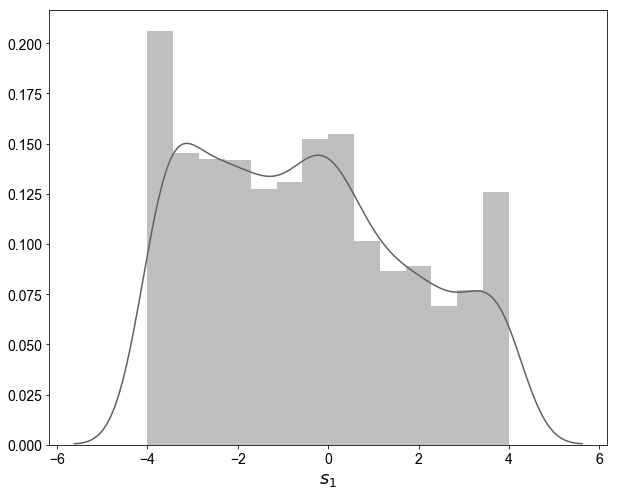

In [21]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[6]]))

## Fits with Standard Deviation

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

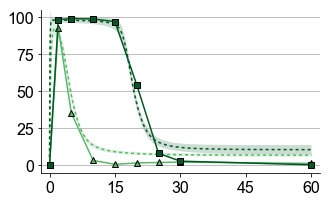

In [55]:
plotting.plt_param_cis(model_expo_lin, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
../../python_modules\model_gly.py:67: RuntimeWarning: overflow encountered in exp
  K = k1/(1+np.exp(-a*(scale*sig+kb-gly)))
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last te

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

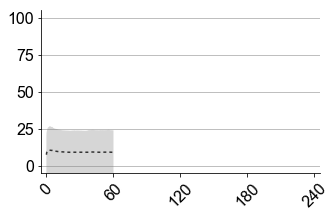

In [62]:
plotting.plt_param_cis(model_expo_lin, sorted_thetas_EA, params_constants, initials,  [0], time, 2,
                        exp_data=None, exp_time=None, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

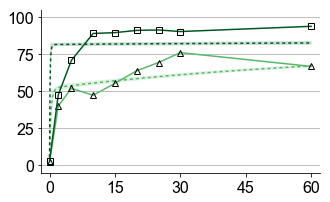

In [56]:
plotting.plt_param_cis(model_expo_lin, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

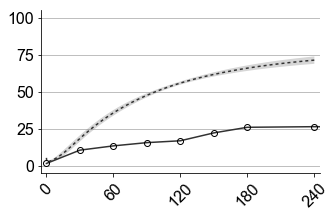

In [57]:
plotting.plt_param_cis(model_expo_lin, sorted_thetas_EA[:10], params_constants, initials,  [0], time2, 2,
                        exp_data=mapk_data_t100a_0, exp_time=mapk_time_t100a_0, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

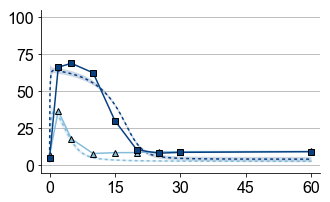

In [63]:
plotting.plt_param_cis(model_expo_lin, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

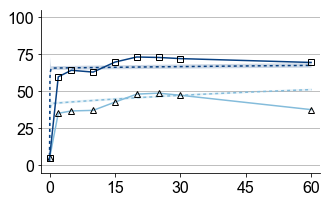

In [35]:
plotting.plt_param_cis(model_lin, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

## Individual Runs

<Figure size 720x576 with 0 Axes>

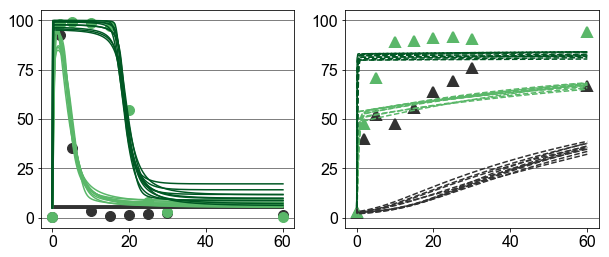

In [64]:
# original parameter values
plotting.plt_param_behaviors(model_expo_lin, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 2, mapk_wt_data, mapk_t100a_data, mapk_time,ss=True)

<Figure size 720x576 with 0 Axes>

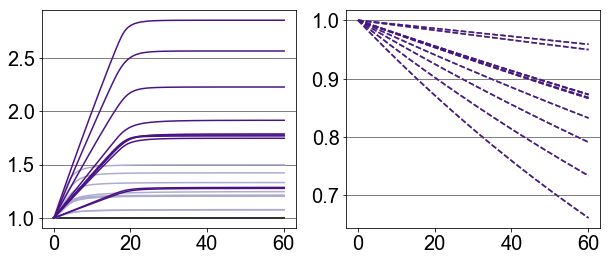

In [99]:
# original parameter values
plotting.plt_param_behaviors(model_expo_lin, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 3, None, None, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

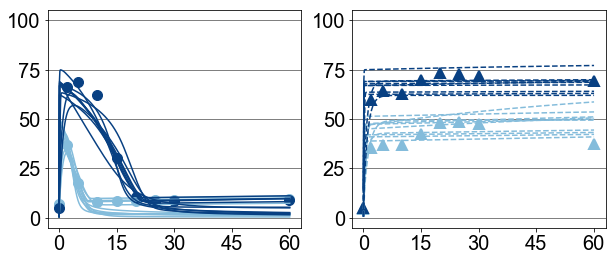

In [74]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials,  [150000,550000], time, 1, map2k_wt_data, map2k_t100a_data, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

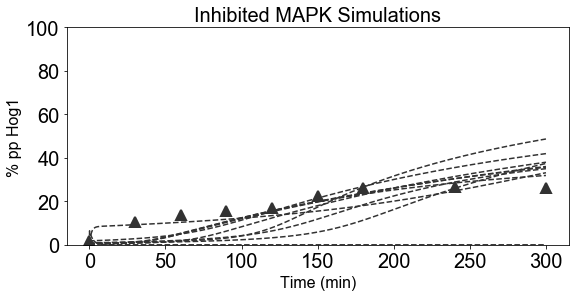

In [75]:
mapk_time_t100a_long = [0, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(model_fxns, sorted_thetas_EA, 10, params_constants, initials, mapk_data_t100a_0[0], mapk_time_t100a_long)

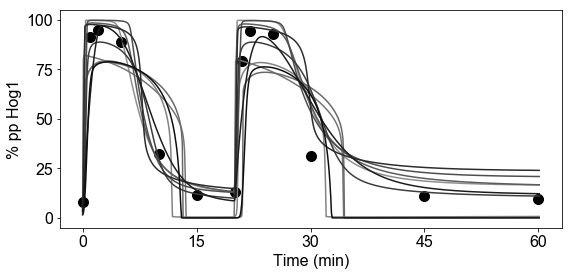

In [38]:
plotting.plt_ramp_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials, time, 2, ss = True, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

In [42]:
sims_M2c_kb_ea_l = plotting.simdata_to_list(M2c_fxns, M2c_sorted_thetas_EA, params_constants, initials, time, 2, ss = True)

0% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9% complete.
19% complete.
29% complete.
39% complete.
49% complete.
59% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


69% complete.
79% complete.
89% complete.
99% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


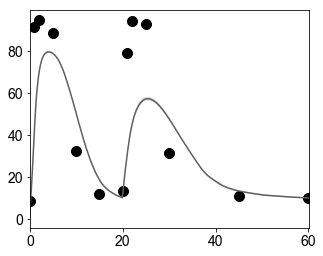

In [46]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


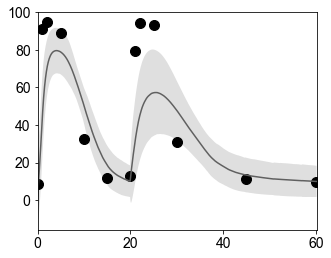

In [47]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time, ci='sd')

# Model Gly lin gly 0 

## Load simulation data

In [129]:
folder = 'C:/Users/sksuzuki/Downloads/Rozemarijn/Testing_my_model/Glycerol/200205_kb_M2c_K_linear_gly0/'


all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 996
Best last gen MSE: 1136.448468181882
Mean last gen MSEs of top 5%: 1190.4416225528473


## MSE results

In [130]:
## sort and check MSE calculation
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)


exp_data1 = mapk_wt_data, [mapk_data_t100a_0[0], mapk_t100a_data[0], mapk_t100a_data[1]], map2k_wt_data, map2k_t100a_data, hog1_ramp_data, mapk_ptpD_data
exp_time1 = mapk_time, mapk_time_t100a_long, mapk_ramp_time

check = model_supp.calc_sim_score_lin(model_lin_gly0, sorted_thetas_EA[0], exp_data1, exp_time1, params_constants, initials)
print(check[:18])
sum(check[:18])

[  43.58970549   29.11321006    0.            0.            0.
    0.            0.         1068.88638499   77.86731588  189.44410198
    0.            0.            0.            0.           30.38889635
   41.85564663   40.0342272    26.83222006]


1548.0117086343744

No handles with labels found to put in legend.


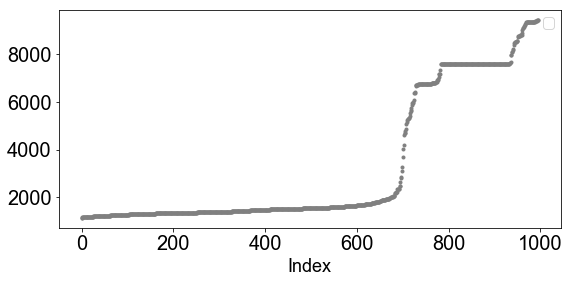

In [96]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


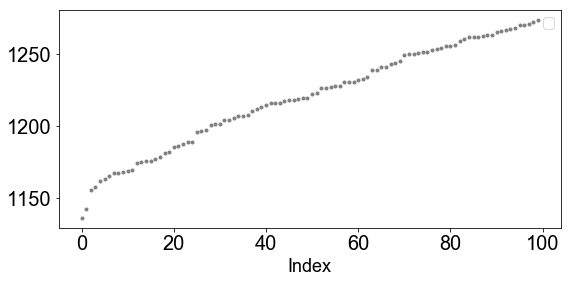

In [70]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

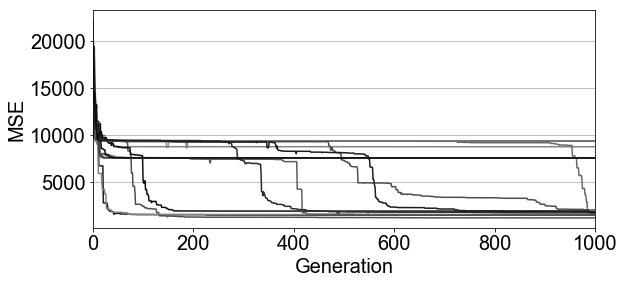

In [71]:
plotting.plt_mses_gen(1000,all_mses,20)

## Parameter Distributions

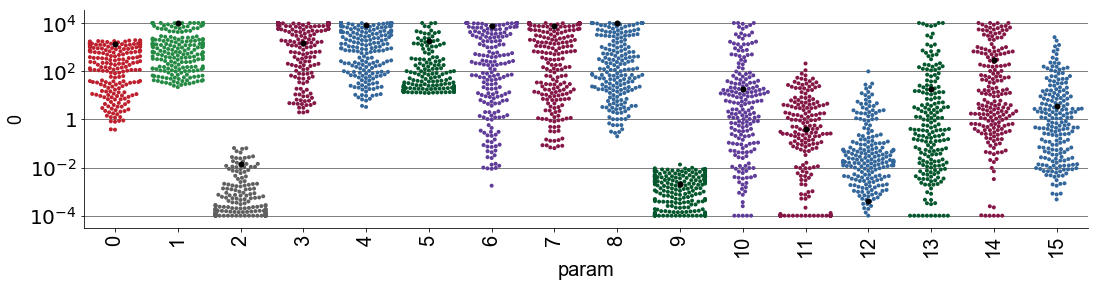

In [133]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
# df_top_thetas_EA.columns = labelnames

num_plt = 200
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
# df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param

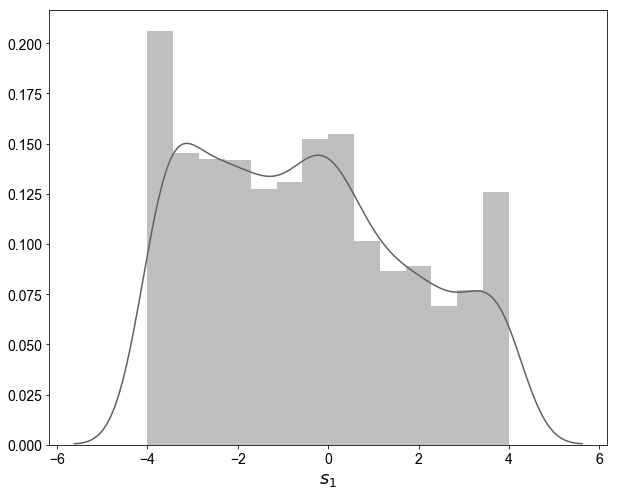

In [21]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[6]]))

## Fits with Standard Deviation

Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

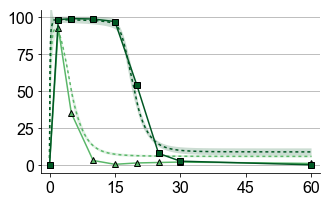

In [74]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

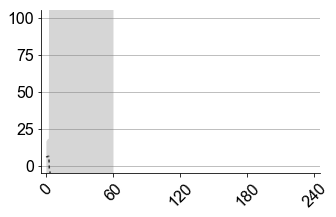

In [75]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA, params_constants, initials,  [0], time, 2,
                        exp_data=None, exp_time=None, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

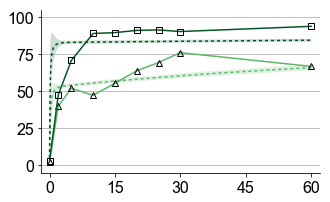

In [76]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

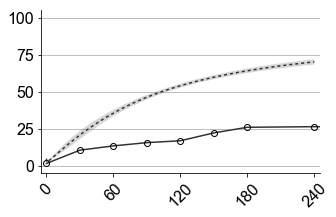

In [77]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[:10], params_constants, initials,  [0], time2, 2,
                        exp_data=mapk_data_t100a_0, exp_time=mapk_time_t100a_0, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

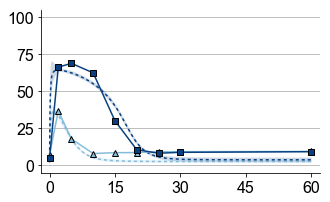

In [78]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

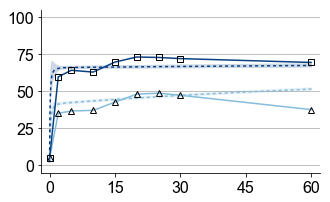

In [79]:
plotting.plt_param_cis(model_lin_gly0, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

## Individual Runs

<Figure size 720x576 with 0 Axes>

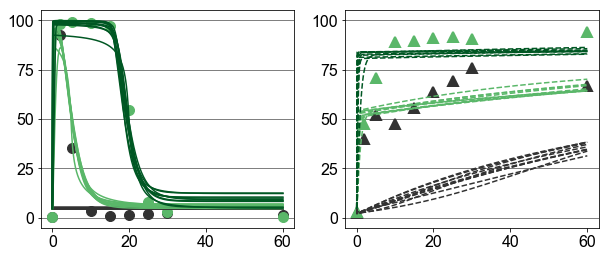

In [80]:
# original parameter values
plotting.plt_param_behaviors(model_lin_gly0, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 2, mapk_wt_data, mapk_t100a_data, mapk_time,ss=True)

<Figure size 720x576 with 0 Axes>

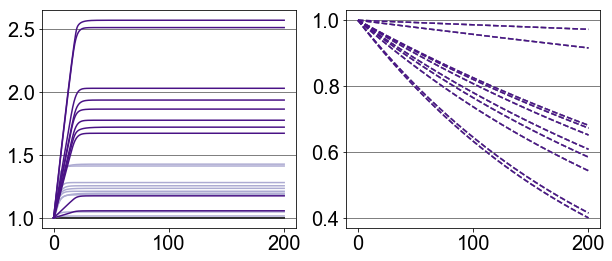

In [81]:
# original parameter values
plotting.plt_param_behaviors(model_lin_gly0, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 3, None, None, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

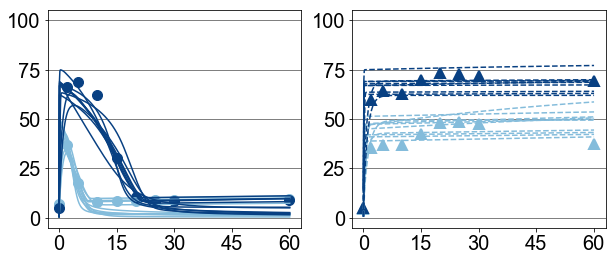

In [74]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials,  [150000,550000], time, 1, map2k_wt_data, map2k_t100a_data, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

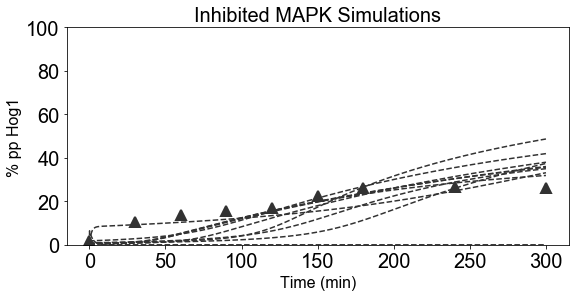

In [75]:
mapk_time_t100a_long = [0, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(model_fxns, sorted_thetas_EA, 10, params_constants, initials, mapk_data_t100a_0[0], mapk_time_t100a_long)

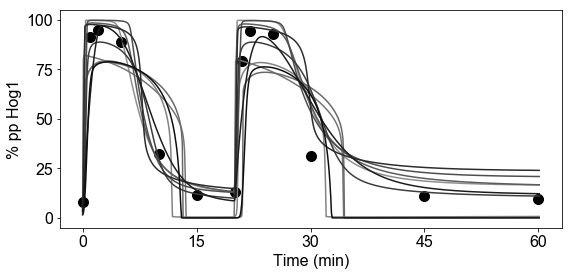

In [38]:
plotting.plt_ramp_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials, time, 2, ss = True, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

In [42]:
sims_M2c_kb_ea_l = plotting.simdata_to_list(M2c_fxns, M2c_sorted_thetas_EA, params_constants, initials, time, 2, ss = True)

0% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9% complete.
19% complete.
29% complete.
39% complete.
49% complete.
59% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


69% complete.
79% complete.
89% complete.
99% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


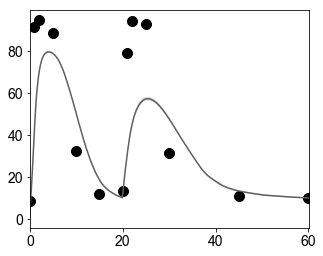

In [46]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


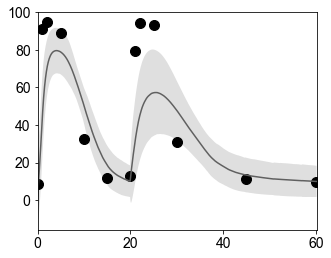

In [47]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time, ci='sd')

# Model Gly hill fxn

## Load simulation data

In [128]:
folder = 'C:/Users/sksuzuki/Downloads/Rozemarijn/Testing_my_model/200205_kb_M2c_K_v2/'


all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 1000
Best last gen MSE: 1319.882308899515
Mean last gen MSEs of top 5%: 1533.7223079641349


## MSE results

In [122]:
## sort and check MSE calculation
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)


exp_data1 = mapk_wt_data, [mapk_data_t100a_0[0], mapk_t100a_data[0], mapk_t100a_data[1]], map2k_wt_data, map2k_t100a_data, hog1_ramp_data, mapk_ptpD_data
exp_time1 = mapk_time, mapk_time_t100a_long, mapk_ramp_time

check = model_supp.calc_sim_score_lin(model_hillfxn, sorted_thetas_EA[3], exp_data1, exp_time1, params_constants, initials)
print(check[:18])
sum(check[:18])

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


TypeError: 'int' object is not subscriptable

No handles with labels found to put in legend.


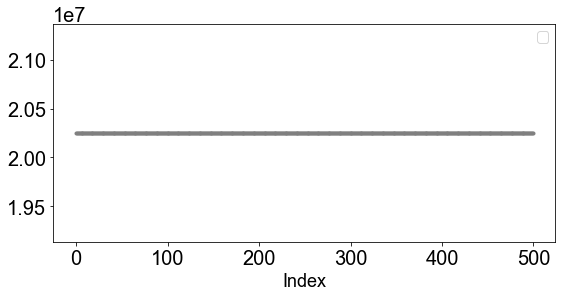

In [119]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


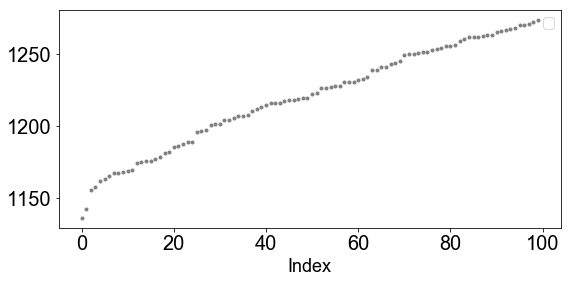

In [70]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

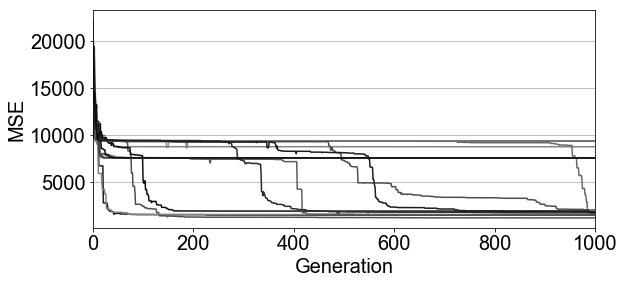

In [71]:
plotting.plt_mses_gen(1000,all_mses,20)

## Parameter Distributions

In [72]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

num_plt = 10
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param

ValueError: Length mismatch: Expected axis has 16 elements, new values have 17 elements

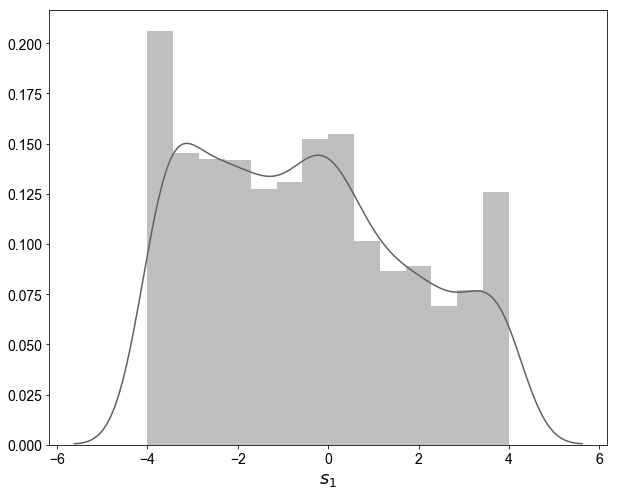

In [21]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[6]]))

## Fits with Standard Deviation

Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

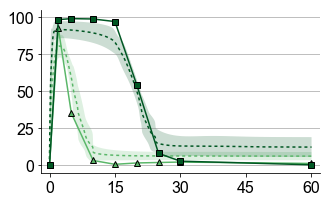

In [109]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
../../python_modules\model_gly.py:108: RuntimeWarning: divide by zero enco

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

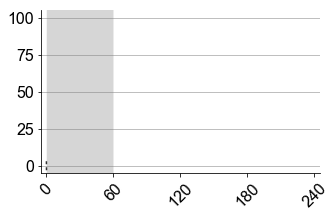

In [110]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA, params_constants, initials,  [0], time, 2,
                        exp_data=None, exp_time=None, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

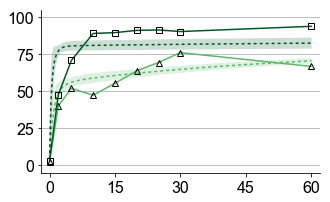

In [111]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 2,
                        exp_data=mapk_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

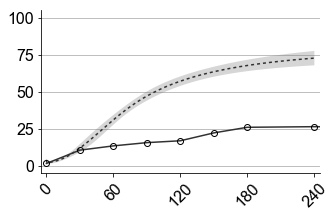

In [112]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA[:10], params_constants, initials,  [0], time2, 2,
                        exp_data=mapk_data_t100a_0, exp_time=mapk_time_t100a_0, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.
Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

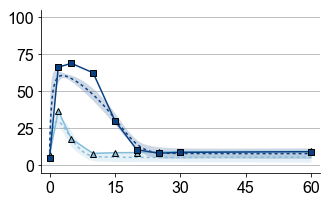

In [113]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_wt_data, exp_time=mapk_time, ss=True, t100a=False, ptpD=False, ci='sd',
                        save_fig='')

Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

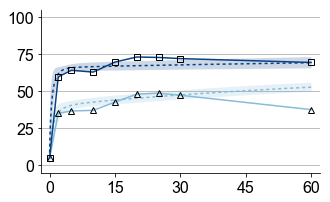

In [114]:
plotting.plt_param_cis(model_hillfxn, sorted_thetas_EA[:10], params_constants, initials,  wt_doses, time, 1,
                        exp_data=map2k_t100a_data, exp_time=mapk_time, ss=True, t100a=True, ptpD=False, ci='sd',
                        save_fig='')

## Individual Runs

<Figure size 720x576 with 0 Axes>

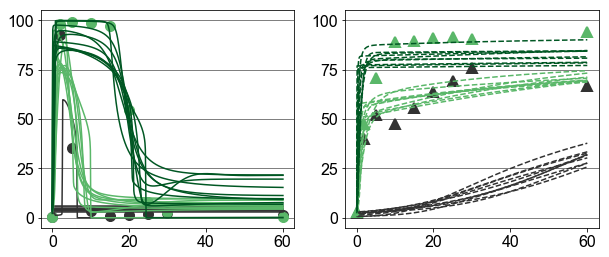

In [115]:
# original parameter values
plotting.plt_param_behaviors(model_hillfxn, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 2, mapk_wt_data, mapk_t100a_data, mapk_time,ss=True)

<Figure size 720x576 with 0 Axes>

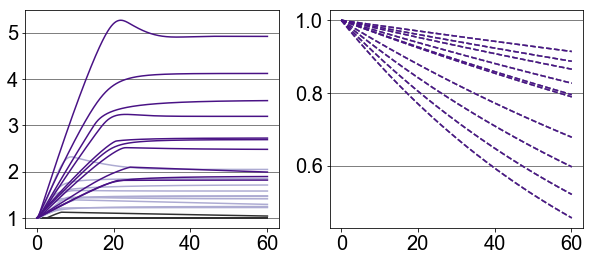

In [116]:
# original parameter values
plotting.plt_param_behaviors(model_hillfxn, sorted_thetas_EA, 10, params_constants, initials,  [0, 150000, 550000], time, 3, None, None, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

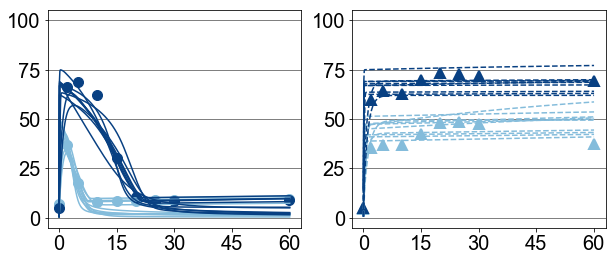

In [74]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials,  [150000,550000], time, 1, map2k_wt_data, map2k_t100a_data, mapk_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

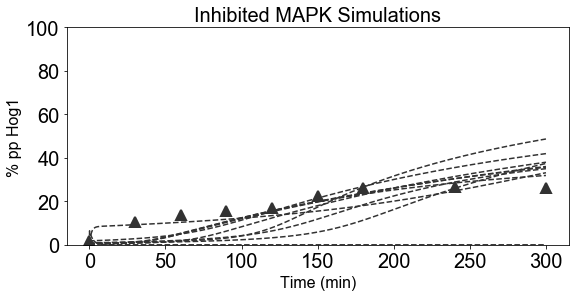

In [75]:
mapk_time_t100a_long = [0, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(model_fxns, sorted_thetas_EA, 10, params_constants, initials, mapk_data_t100a_0[0], mapk_time_t100a_long)

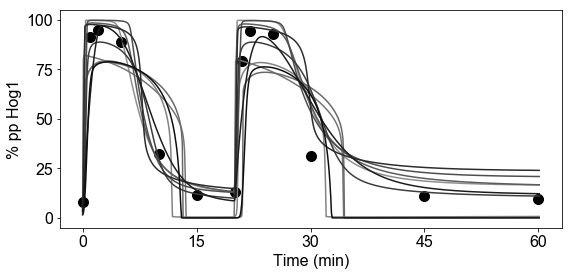

In [38]:
plotting.plt_ramp_behaviors(model_fxns, sorted_thetas_EA, 10, params_constants, initials, time, 2, ss = True, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

In [42]:
sims_M2c_kb_ea_l = plotting.simdata_to_list(M2c_fxns, M2c_sorted_thetas_EA, params_constants, initials, time, 2, ss = True)

0% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9% complete.
19% complete.
29% complete.
39% complete.
49% complete.
59% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


69% complete.
79% complete.
89% complete.
99% complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


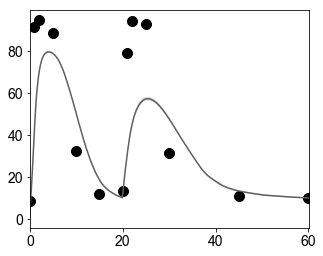

In [46]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


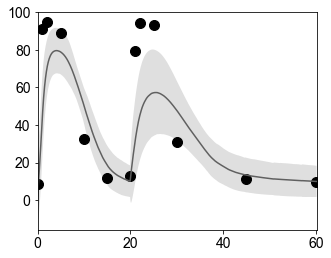

In [47]:
plotting.plt_ramp_cis(sims_M2c_kb_ea_l, time, hog1_ramp_data=hog1_ramp_data, mapk_ramp_time=mapk_ramp_time, ci='sd')